In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections as col


import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings("ignore")

In [14]:
new=pd.read_csv('data.csv')

In [15]:
new.head(5)

Temperature  Heating rate  Maintenance  Specimen type  Cement  Water  \
0          800           6.0          1.0              1   262.5  210.0   
1          800           6.0          1.0              1   357.5  176.0   
2          800           6.0          1.0              1   357.5  176.0   
3          800           6.0          1.0              1   357.5  176.0   
4           25           6.0          0.0              1   262.5  210.0   

    Sand  Aggregate  Silica fume  Fly ash  Slag  Metakaolin  Superplasticizer  \
0  588.8     1251.2          0.0     87.5     0           0               0.0   
1  542.7     1153.3         55.0    137.5     0           0               1.8   
2  542.7     1153.3         55.0    137.5     0           0               1.8   
3  542.7     1153.3         55.0    137.5     0           0               1.8   
4  588.8     1251.2          0.0     87.5     0           0               0.0   

   Steel fiber  SF length  SF aspect ratio  Polypropylene fiber  PPF length  \
0          0.0        0.0              0.0                 0.00           0   
1          0.0        0.0              0.0                 0.00           0   
2         78.0       20.0             60.0                 0.00           0   
3          0.0       20.0             60.0                 1.82          25   
4          0.0        0.0              0.0                 0.00           0   

   PPF aspect ratio  Compressive strength  
0               0.0                  15.8  
1               0.0                  24.9  
2               0.0                  38.7  
3              60.0                  23.8  
4               0.0                  34.9

In [16]:
new.shape

(326, 20)

In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           326 non-null    int64  
 1   Heating rate          326 non-null    float64
 2   Maintenance           326 non-null    float64
 3   Specimen type         326 non-null    int64  
 4   Cement                326 non-null    float64
 5   Water                 326 non-null    float64
 6   Sand                  326 non-null    float64
 7   Aggregate             326 non-null    float64
 8   Silica fume           326 non-null    float64
 9   Fly ash               326 non-null    float64
 10  Slag                  326 non-null    int64  
 11  Metakaolin            326 non-null    int64  
 12  Superplasticizer      326 non-null    float64
 13  Steel fiber           326 non-null    float64
 14  SF length             326 non-null    float64
 15  SF aspect ratio       3

In [18]:
new.describe()

Temperature  Heating rate  Maintenance  Specimen type      Cement  \
count   326.000000    326.000000   326.000000     326.000000  326.000000   
mean    347.607362      4.751534     1.233129       2.411043  533.556942   
std     246.130258      7.366112     0.966806       0.790171  137.548126   
min      20.000000      0.000000     0.000000       0.000000  262.500000   
25%     100.000000      2.125000     1.000000       2.000000  442.500000   
50%     300.000000      2.500000     1.000000       2.000000  500.000000   
75%     600.000000      5.000000     2.000000       3.000000  605.139186   
max     900.000000     30.000000     5.000000       4.000000  900.000000   

            Water         Sand    Aggregate  Silica fume     Fly ash  \
count  326.000000   326.000000   326.000000   326.000000  326.000000   
mean   191.552129   874.238007   857.134920    24.557301   36.490675   
std     38.675199   146.117282   259.298705    58.934546   46.690163   
min    143.000000   542.700000     0.000000     0.000000    0.000000   
25%    150.000000   710.000000   857.000000     0.000000    0.000000   
50%    203.280000   919.811563   904.000000     0.610000    0.000000   
75%    229.952891  1005.000000   950.855203     2.420000   90.770000   
max    235.600000  1040.000000  1251.200000   220.000000  137.500000   

             Slag  Metakaolin  Superplasticizer  Steel fiber   SF length  \
count  326.000000  326.000000        326.000000   326.000000  326.000000   
mean     5.595092    4.601227          2.102475    48.631503   14.815337   
std     19.877978   20.983375          4.023927    44.694582   12.391913   
min      0.000000    0.000000          0.000000     0.000000    0.000000   
25%      0.000000    0.000000          0.200000     0.000000    0.000000   
50%      0.000000    0.000000          1.000000    50.000000   13.000000   
75%      0.000000    0.000000          1.500000    78.375000   25.000000   
max     76.000000  100.000000         16.000000   200.000000   38.000000   

       SF aspect ratio  Polypropylene fiber  PPF length  PPF aspect ratio  \
count       326.000000           326.000000  326.000000        326.000000   
mean         34.377607             0.669042    6.846626         73.019294   
std          27.518466             0.683793    6.500729         95.860602   
min           0.000000             0.000000    0.000000          0.000000   
25%           0.000000             0.000000    0.000000          0.000000   
50%          45.250000             0.727200   10.000000         66.670000   
75%          45.250000             1.090800   10.000000         66.670000   
max          80.000000             2.000000   25.000000        360.000000   

       Compressive strength  
count            326.000000  
mean              55.761810  
std               44.770754  
min                4.570000  
25%               32.167500  
50%               44.610000  
75%               68.342500  
max              221.452000

In [19]:
new.Temperature.unique

<bound method Series.unique of 0      800
1      800
2      800
3      800
4       25
      ... 
321    200
322    300
323    400
324    500
325    600
Name: Temperature, Length: 326, dtype: int64>

In [20]:
new['Temperature'].value_counts()

600    55
300    50
25     48
200    39
400    39
800    28
100    28
500    24
20     11
750     2
900     2
Name: Temperature, dtype: int64

<Axes: >

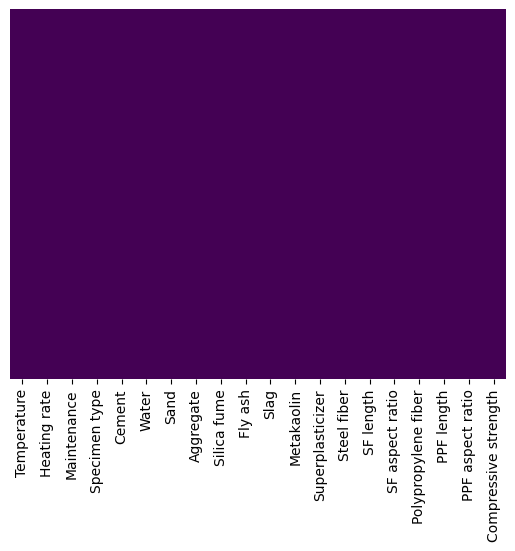

In [21]:
# first let us try to visualize the missing columns in each and every feature
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### It is visible that there are no missing values

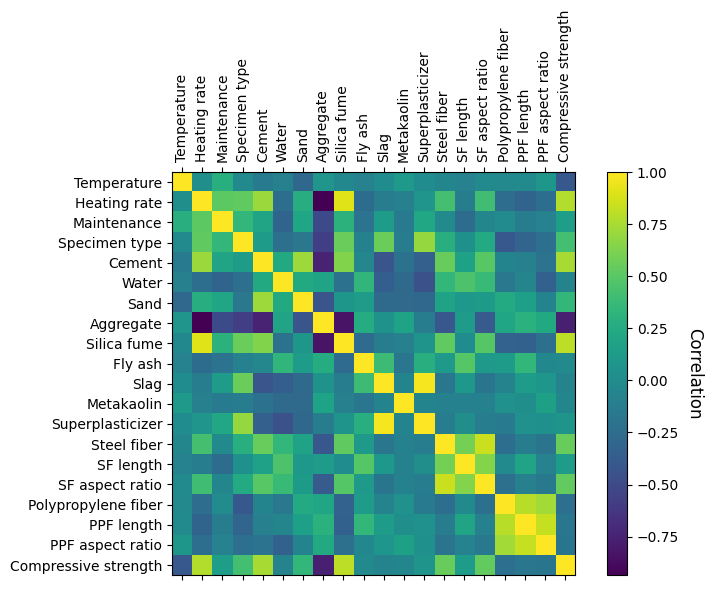

In [22]:
# correlation plot and hist plot
fig, axes = plt.subplots(figsize=(8,6))
image = axes.matshow(new.corr())

axes.set_xticks(np.arange(new.shape[1]))
axes.set_yticks(np.arange(new.shape[1]))
axes.set_xticklabels(new.columns,rotation=90)
axes.set_yticklabels(new.columns)

cbar = axes.figure.colorbar(image, ax=axes)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()


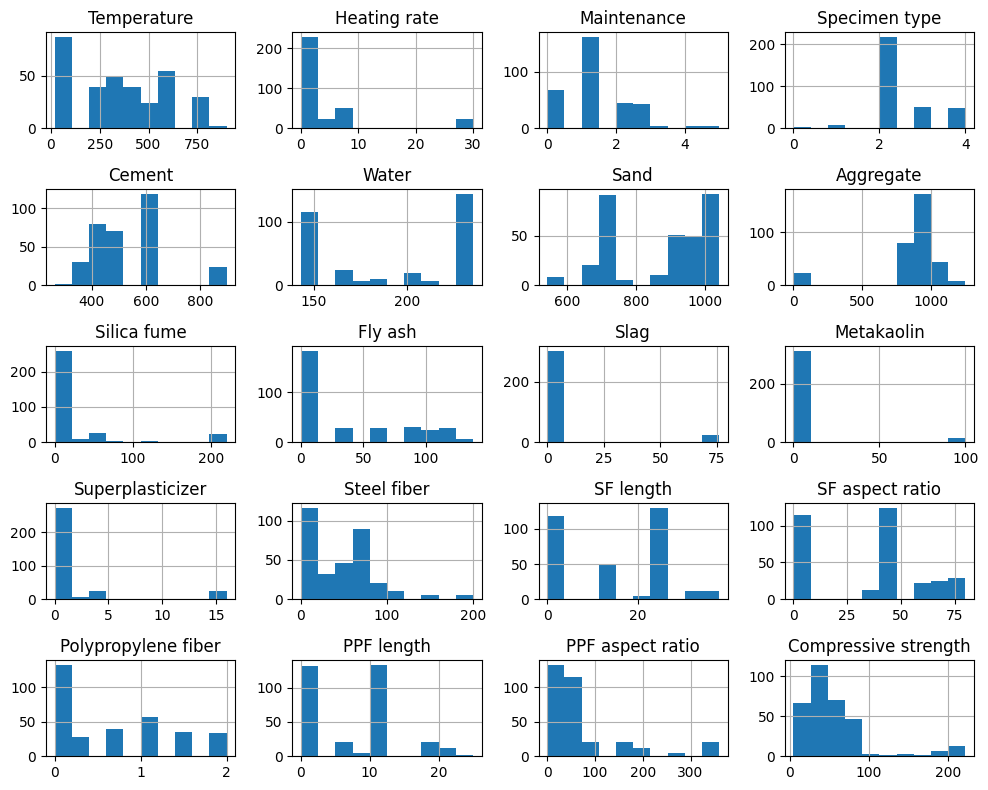

In [23]:
#histogram view of individual columns
fig = new.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

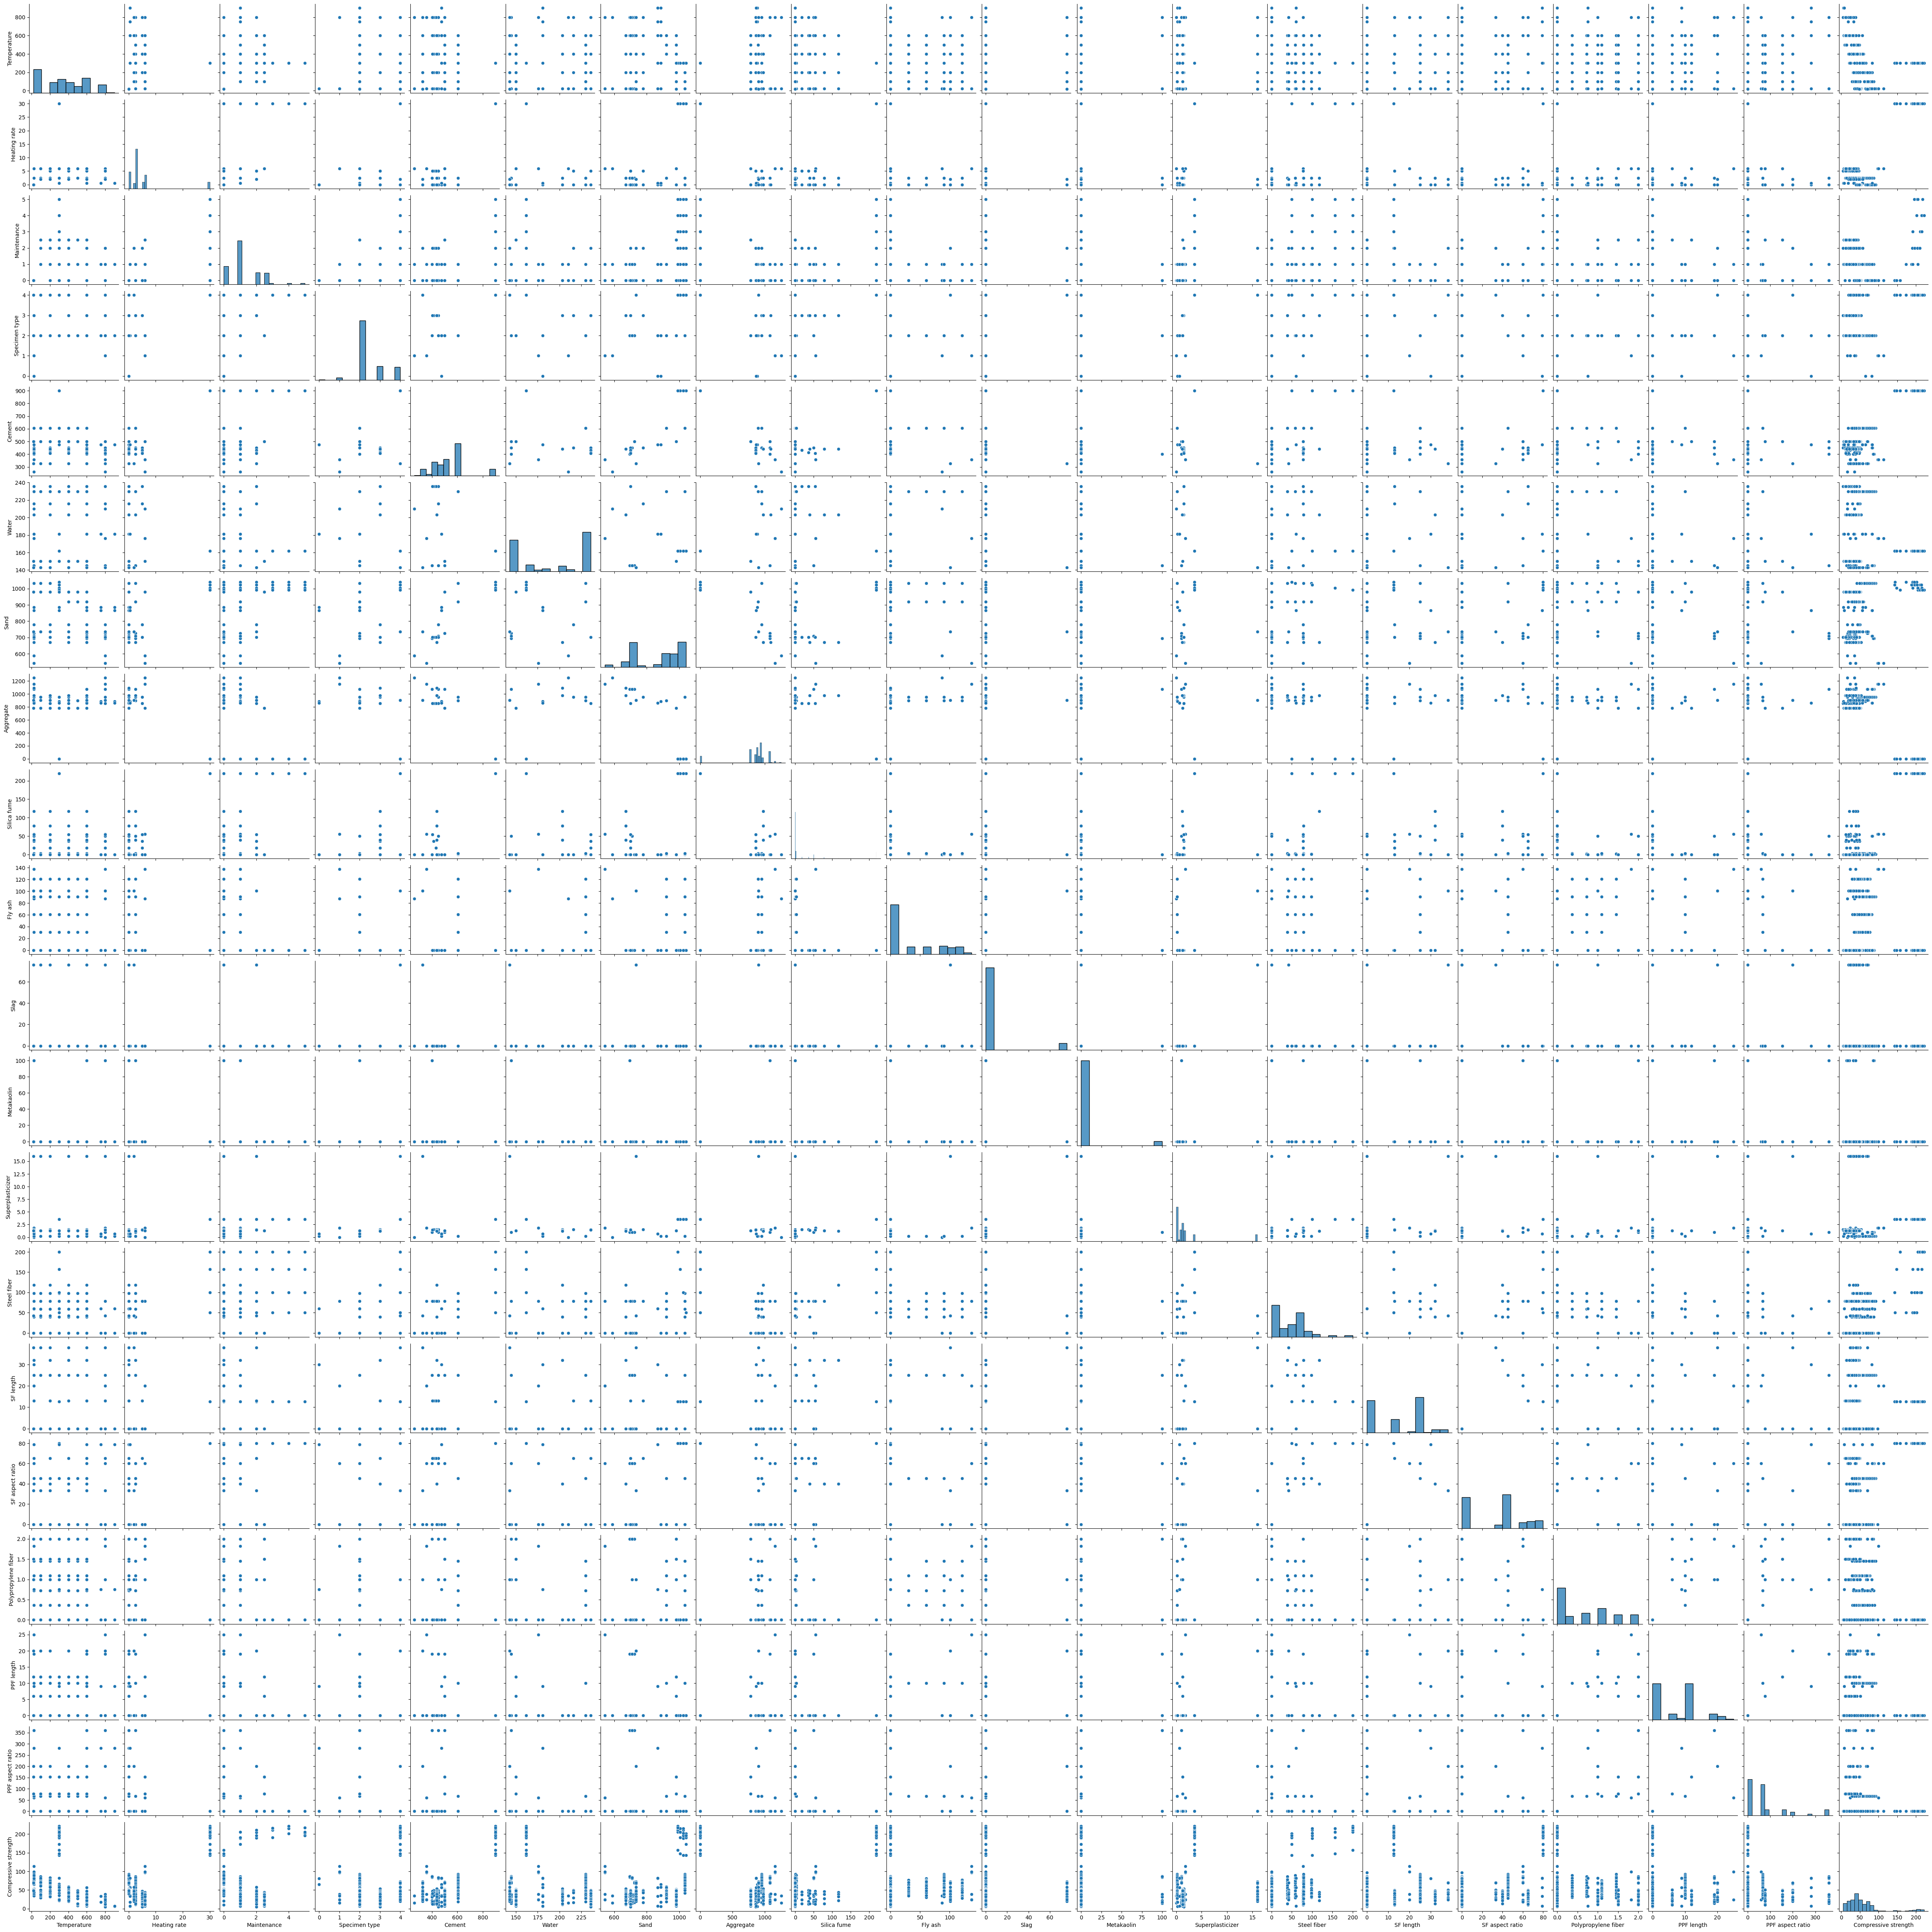

In [24]:
sns.pairplot(new)

In [25]:
new.columns

Index(['Temperature', 'Heating rate', 'Maintenance', 'Specimen type', 'Cement',
       'Water', 'Sand', 'Aggregate', 'Silica fume', 'Fly ash', 'Slag',
       'Metakaolin', 'Superplasticizer', 'Steel fiber', 'SF length',
       'SF aspect ratio', 'Polypropylene fiber', 'PPF length',
       'PPF aspect ratio', 'Compressive strength'],
      dtype='object')

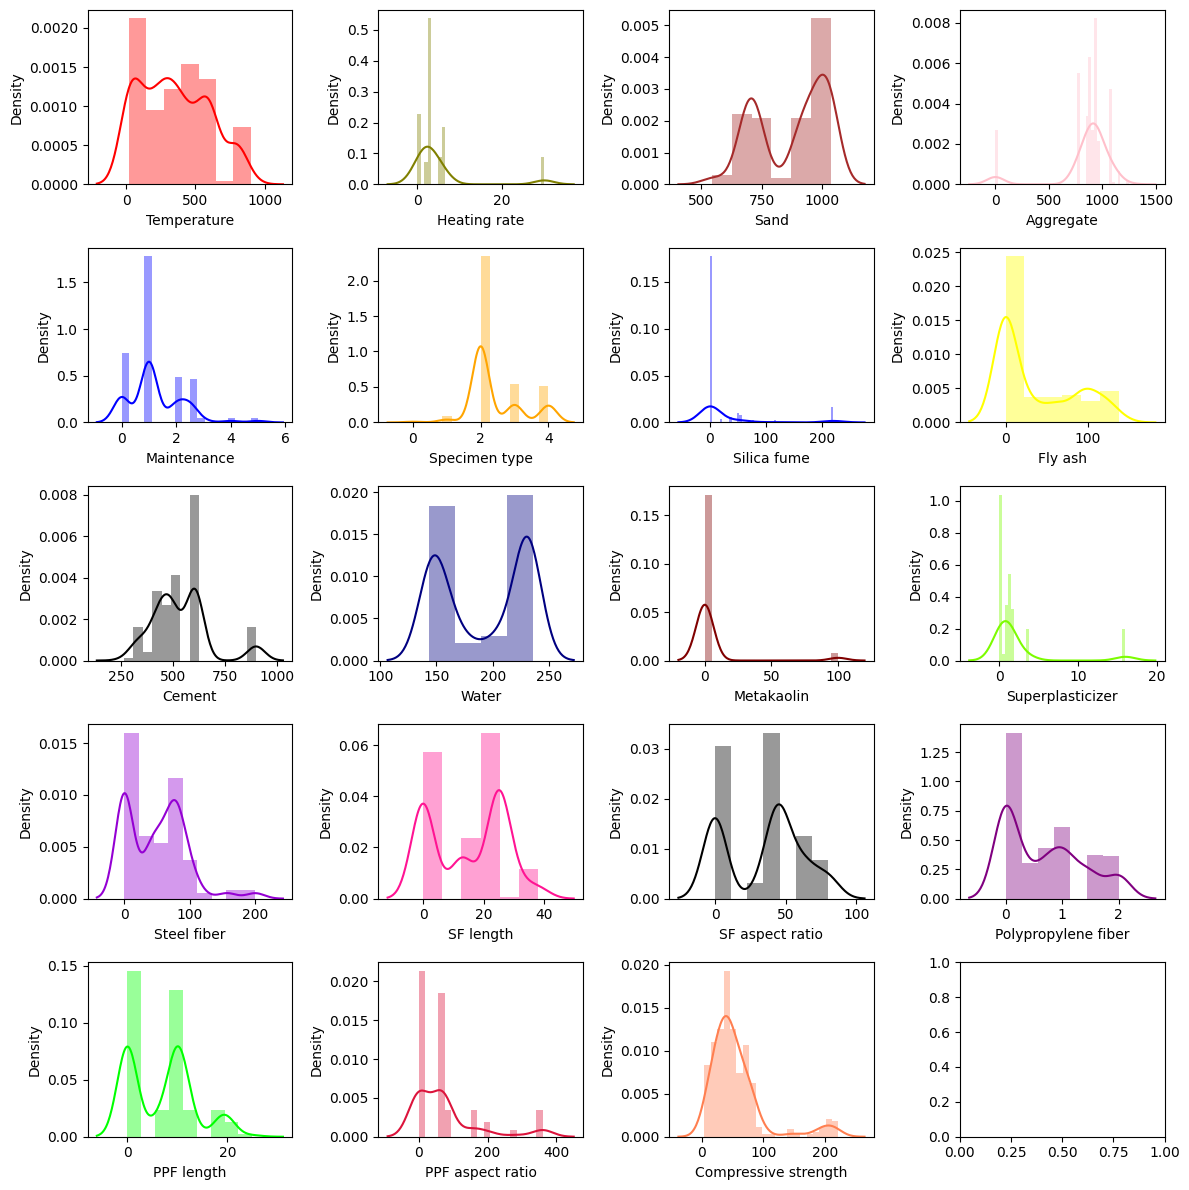

In [26]:
#plotting the distplot for few columns
f, axes = plt.subplots(5, 4, figsize=(12, 12))
sns.distplot(new['Temperature'] , color="red", ax=axes[0, 0])
sns.distplot(new['Heating rate'] , color="olive", ax=axes[0, 1])
sns.distplot(new['Sand'] , color="brown", ax=axes[0, 2])
sns.distplot(new['Aggregate'] , color="pink", ax=axes[0, 3])
sns.distplot(new['Maintenance'] , color="blue", ax=axes[1, 0])
sns.distplot(new['Specimen type'] , color="orange", ax=axes[1, 1])
sns.distplot(new['Silica fume'] , color="blue", ax=axes[1, 2])
sns.distplot(new['Fly ash'] , color="yellow", ax=axes[1, 3])
sns.distplot(new['Cement'] , color="black", ax=axes[2, 0])
sns.distplot(new['Water'] , color="navy", ax=axes[2, 1])
sns.distplot(new[ 'Metakaolin'] , color="maroon", ax=axes[2, 2])
sns.distplot(new['Superplasticizer'] , color="lawngreen", ax=axes[2, 3])
sns.distplot(new[ 'Steel fiber'] , color="darkviolet", ax=axes[3, 0])
sns.distplot(new['SF length'] , color="deeppink", ax=axes[3, 1])
sns.distplot(new['SF aspect ratio'] , color="black", ax=axes[3, 2])
sns.distplot(new['Polypropylene fiber'] , color="purple", ax=axes[3, 3])
sns.distplot(new['PPF length'] , color="lime", ax=axes[4, 0])
sns.distplot(new['PPF aspect ratio'] , color="crimson", ax=axes[4, 1])
sns.distplot(new['Compressive strength'] , color="coral", ax=axes[4, 2])

plt.tight_layout()

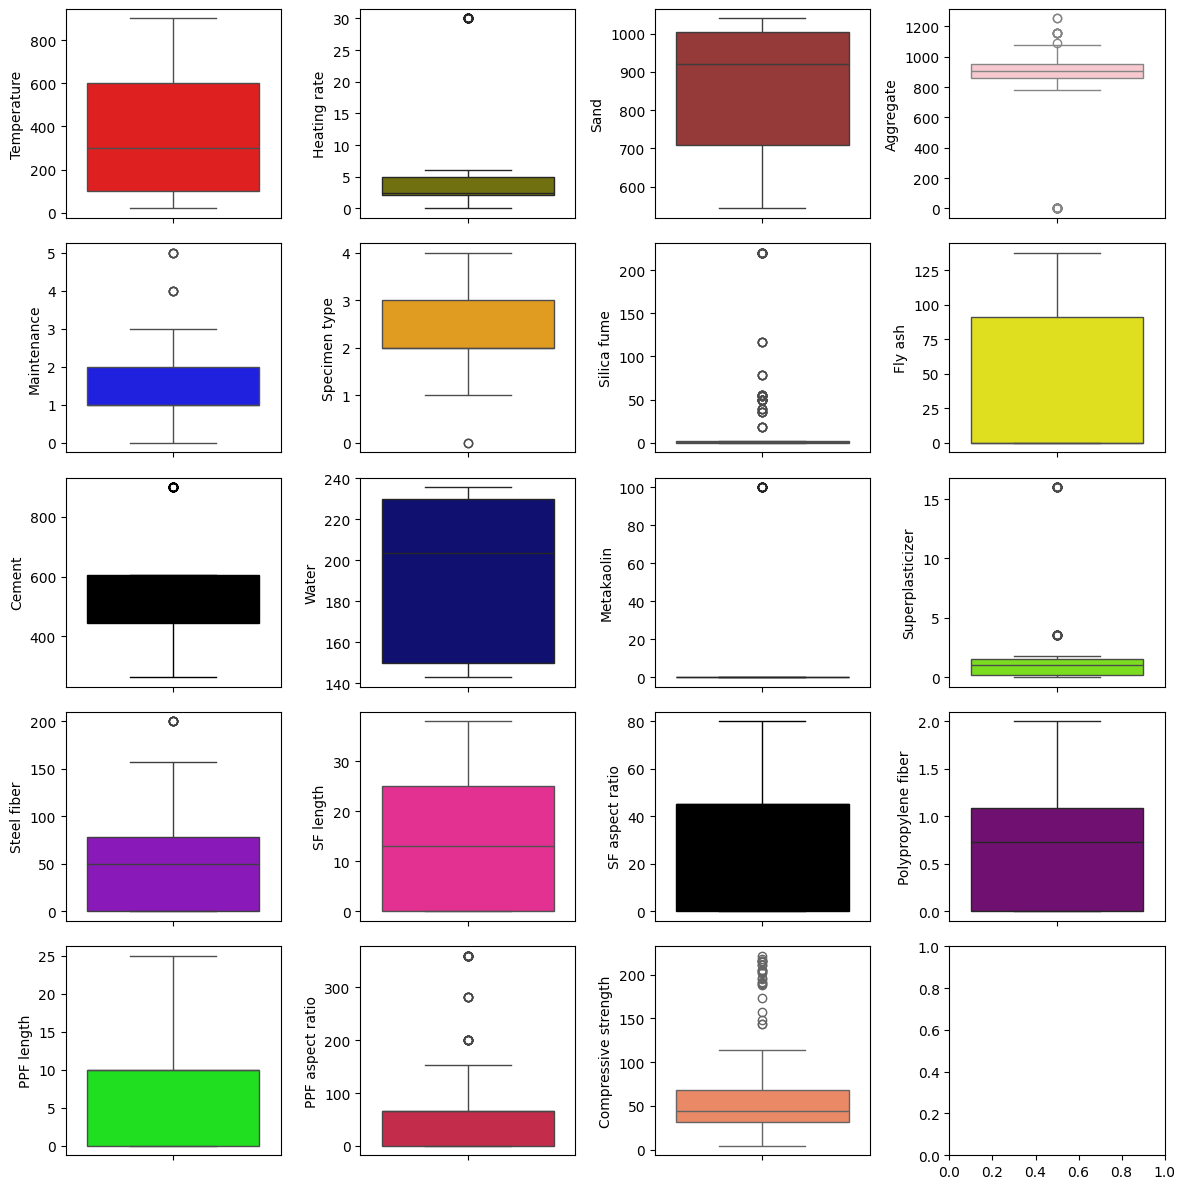

In [27]:
#plotting the boxplot for few columns
f, axes = plt.subplots(5, 4, figsize=(12, 12))
sns.boxplot(new['Temperature'] , color="red", ax=axes[0, 0])
sns.boxplot(new['Heating rate'] , color="olive", ax=axes[0, 1])
sns.boxplot(new['Sand'] , color="brown", ax=axes[0, 2])
sns.boxplot(new['Aggregate'] , color="pink", ax=axes[0, 3])
sns.boxplot(new['Maintenance'] , color="blue", ax=axes[1, 0])
sns.boxplot(new['Specimen type'] , color="orange", ax=axes[1, 1])
sns.boxplot(new['Silica fume'] , color="blue", ax=axes[1, 2])
sns.boxplot(new['Fly ash'] , color="yellow", ax=axes[1, 3])
sns.boxplot(new['Cement'] , color="black", ax=axes[2, 0])
sns.boxplot(new['Water'] , color="navy", ax=axes[2, 1])
sns.boxplot(new[ 'Metakaolin'] , color="maroon", ax=axes[2, 2])
sns.boxplot(new['Superplasticizer'] , color="lawngreen", ax=axes[2, 3])
sns.boxplot(new[ 'Steel fiber'] , color="darkviolet", ax=axes[3, 0])
sns.boxplot(new['SF length'] , color="deeppink", ax=axes[3, 1])
sns.boxplot(new['SF aspect ratio'] , color="black", ax=axes[3, 2])
sns.boxplot(new['Polypropylene fiber'] , color="purple", ax=axes[3, 3])
sns.boxplot(new['PPF length'] , color="lime", ax=axes[4, 0])
sns.boxplot(new['PPF aspect ratio'] , color="crimson", ax=axes[4, 1])
sns.boxplot(new['Compressive strength'] , color="coral", ax=axes[4, 2])

plt.tight_layout()

<Axes: xlabel='Temperature', ylabel='Compressive strength'>

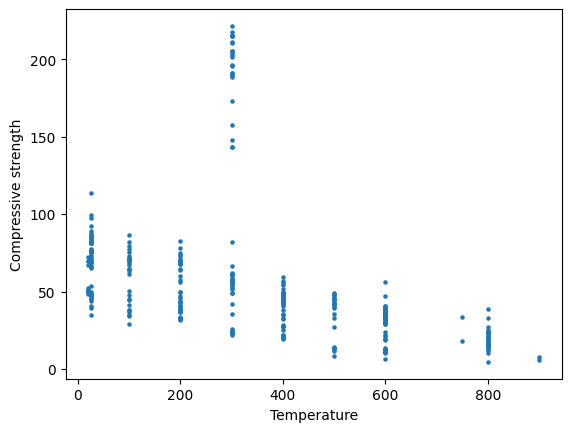

In [28]:
#plotting the temperature vs Compressive strength
new.plot.scatter(x = 'Temperature', y = 'Compressive strength', s= 5)

<Axes: >

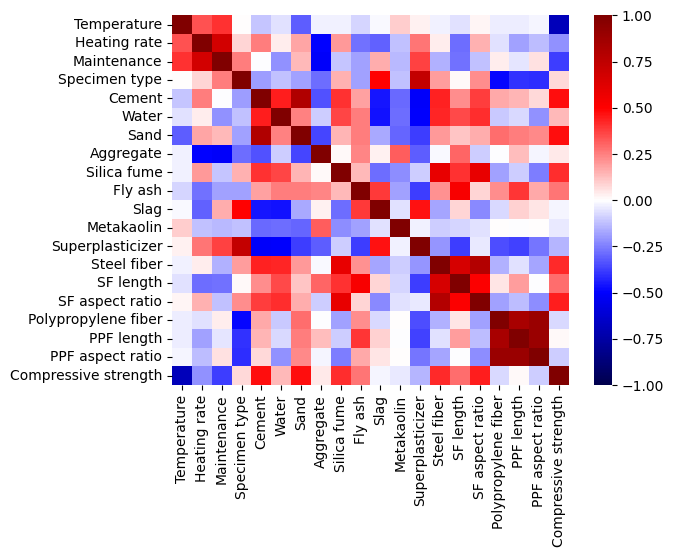

In [29]:
# calculate the correlation matrix
corr = new.corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,center=0, vmin=-1, vmax=1,cmap='seismic')

In [72]:
new2=pd.read_csv('Dataset2.csv')

In [73]:
new2.head(5)

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   336.0                 0.0      0.0  182.0               3.0   
1   140.1                 4.2    215.9  193.9               4.7   
2   350.0                 0.0      0.0  203.0               0.0   
3   162.0               148.0    190.0  179.0              19.0   
4   225.0                 0.0      0.0  181.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  compressive strength  
0             986.0           817.0   28                 44.86  
1            1049.5           710.1   28                 26.42  
2             974.0           775.0   14                 22.53  
3             838.0           741.0   28                 42.08  
4            1113.0           833.0    7                 11.17

In [74]:
new2.shape

(1133, 9)

In [75]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1133 non-null   float64
 1   Blast Furnace Slag    1133 non-null   float64
 2   Fly Ash               1133 non-null   float64
 3   Water                 1133 non-null   float64
 4   Superplasticizer      1133 non-null   float64
 5   Coarse Aggregate      1133 non-null   float64
 6   Fine Aggregate        1133 non-null   float64
 7   Age                   1133 non-null   int64  
 8   compressive strength  1133 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 79.8 KB


In [76]:
new2.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1133.000000         1133.000000  1133.000000  1133.000000   
mean    276.504590           74.266240    62.807811   182.984687   
std     103.469947           84.246758    71.583164    21.713923   
min     102.000000            0.000000     0.000000   121.750000   
25%     190.000000            0.000000     0.000000   167.000000   
50%     266.000000           26.000000     0.000000   185.700000   
75%     342.000000          141.300000   121.970000   193.800000   
max     540.000000          359.400000   260.000000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1133.000000       1133.000000     1133.000000  1133.000000   
mean           6.415552        964.833142      770.490335    44.056487   
std            5.796352         82.788223       79.373870    60.441327   
min            0.000000        708.000000      594.000000     1.000000   
25%            0.000000        919.000000      720.000000    14.000000   
50%            6.700000        966.800000      777.500000    28.000000   
75%           10.160000       1026.600000      821.000000    28.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       compressive strength  
count           1133.000000  
mean              35.838094  
std               16.100569  
min                2.330000  
25%               24.390000  
50%               34.670000  
75%               44.870000  
max               82.600000

In [78]:
new2['compressive strength'].value_counts()

33.40    6
77.30    4
41.05    4
38.46    4
31.35    4
        ..
47.82    1
43.54    1
61.09    1
61.80    1
18.42    1
Name: compressive strength, Length: 917, dtype: int64

<Axes: >

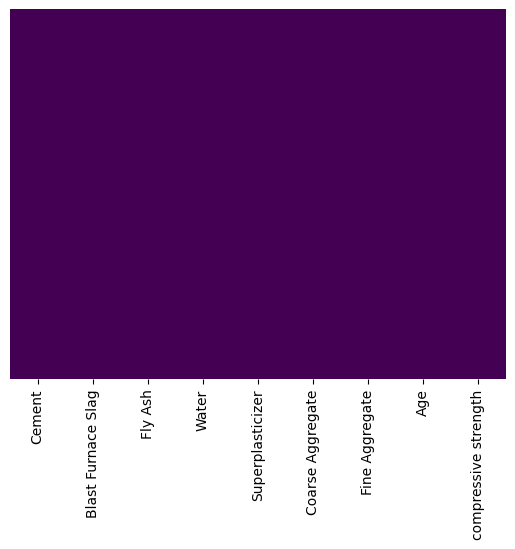

In [79]:
# first let us try to visualize the missing columns in each and every feature
sns.heatmap(new2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### It is visible that there are no missing values

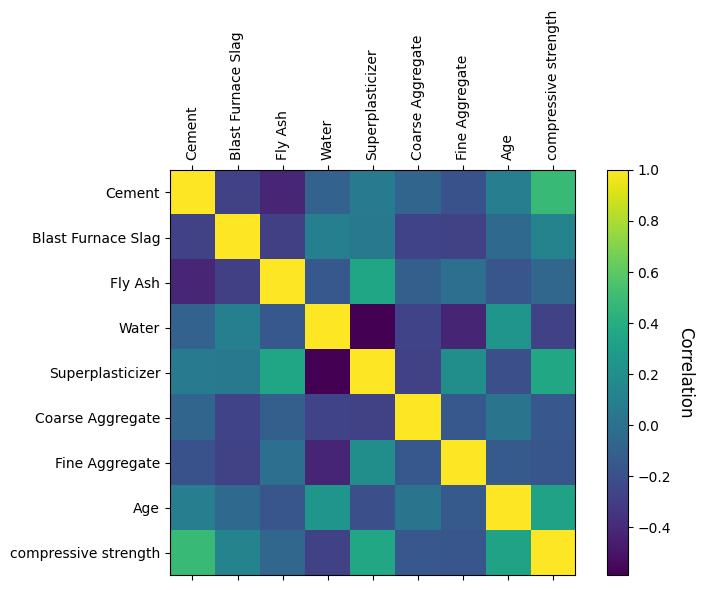

In [80]:
# correlation plot and hist plot
fig, axes = plt.subplots(figsize=(8,6))
image = axes.matshow(new2.corr())

axes.set_xticks(np.arange(new2.shape[1]))
axes.set_yticks(np.arange(new2.shape[1]))
axes.set_xticklabels(new2.columns,rotation=90)
axes.set_yticklabels(new2.columns)

cbar = axes.figure.colorbar(image, ax=axes)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

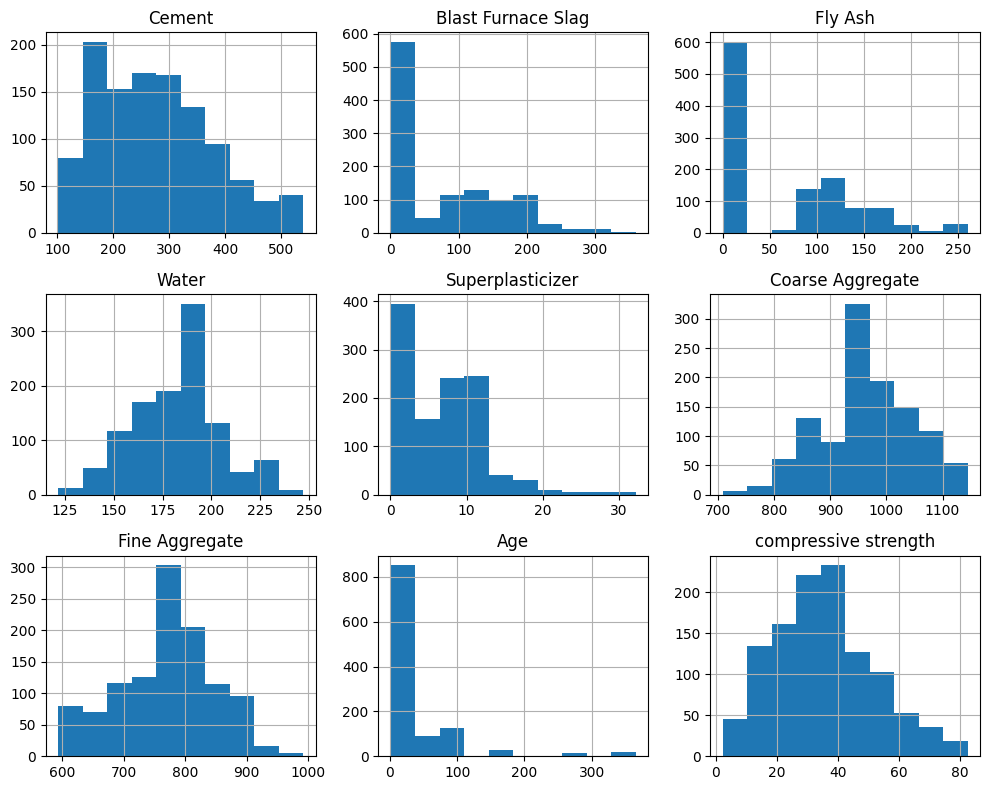

In [81]:
#histogram view of individual columns
fig = new2.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

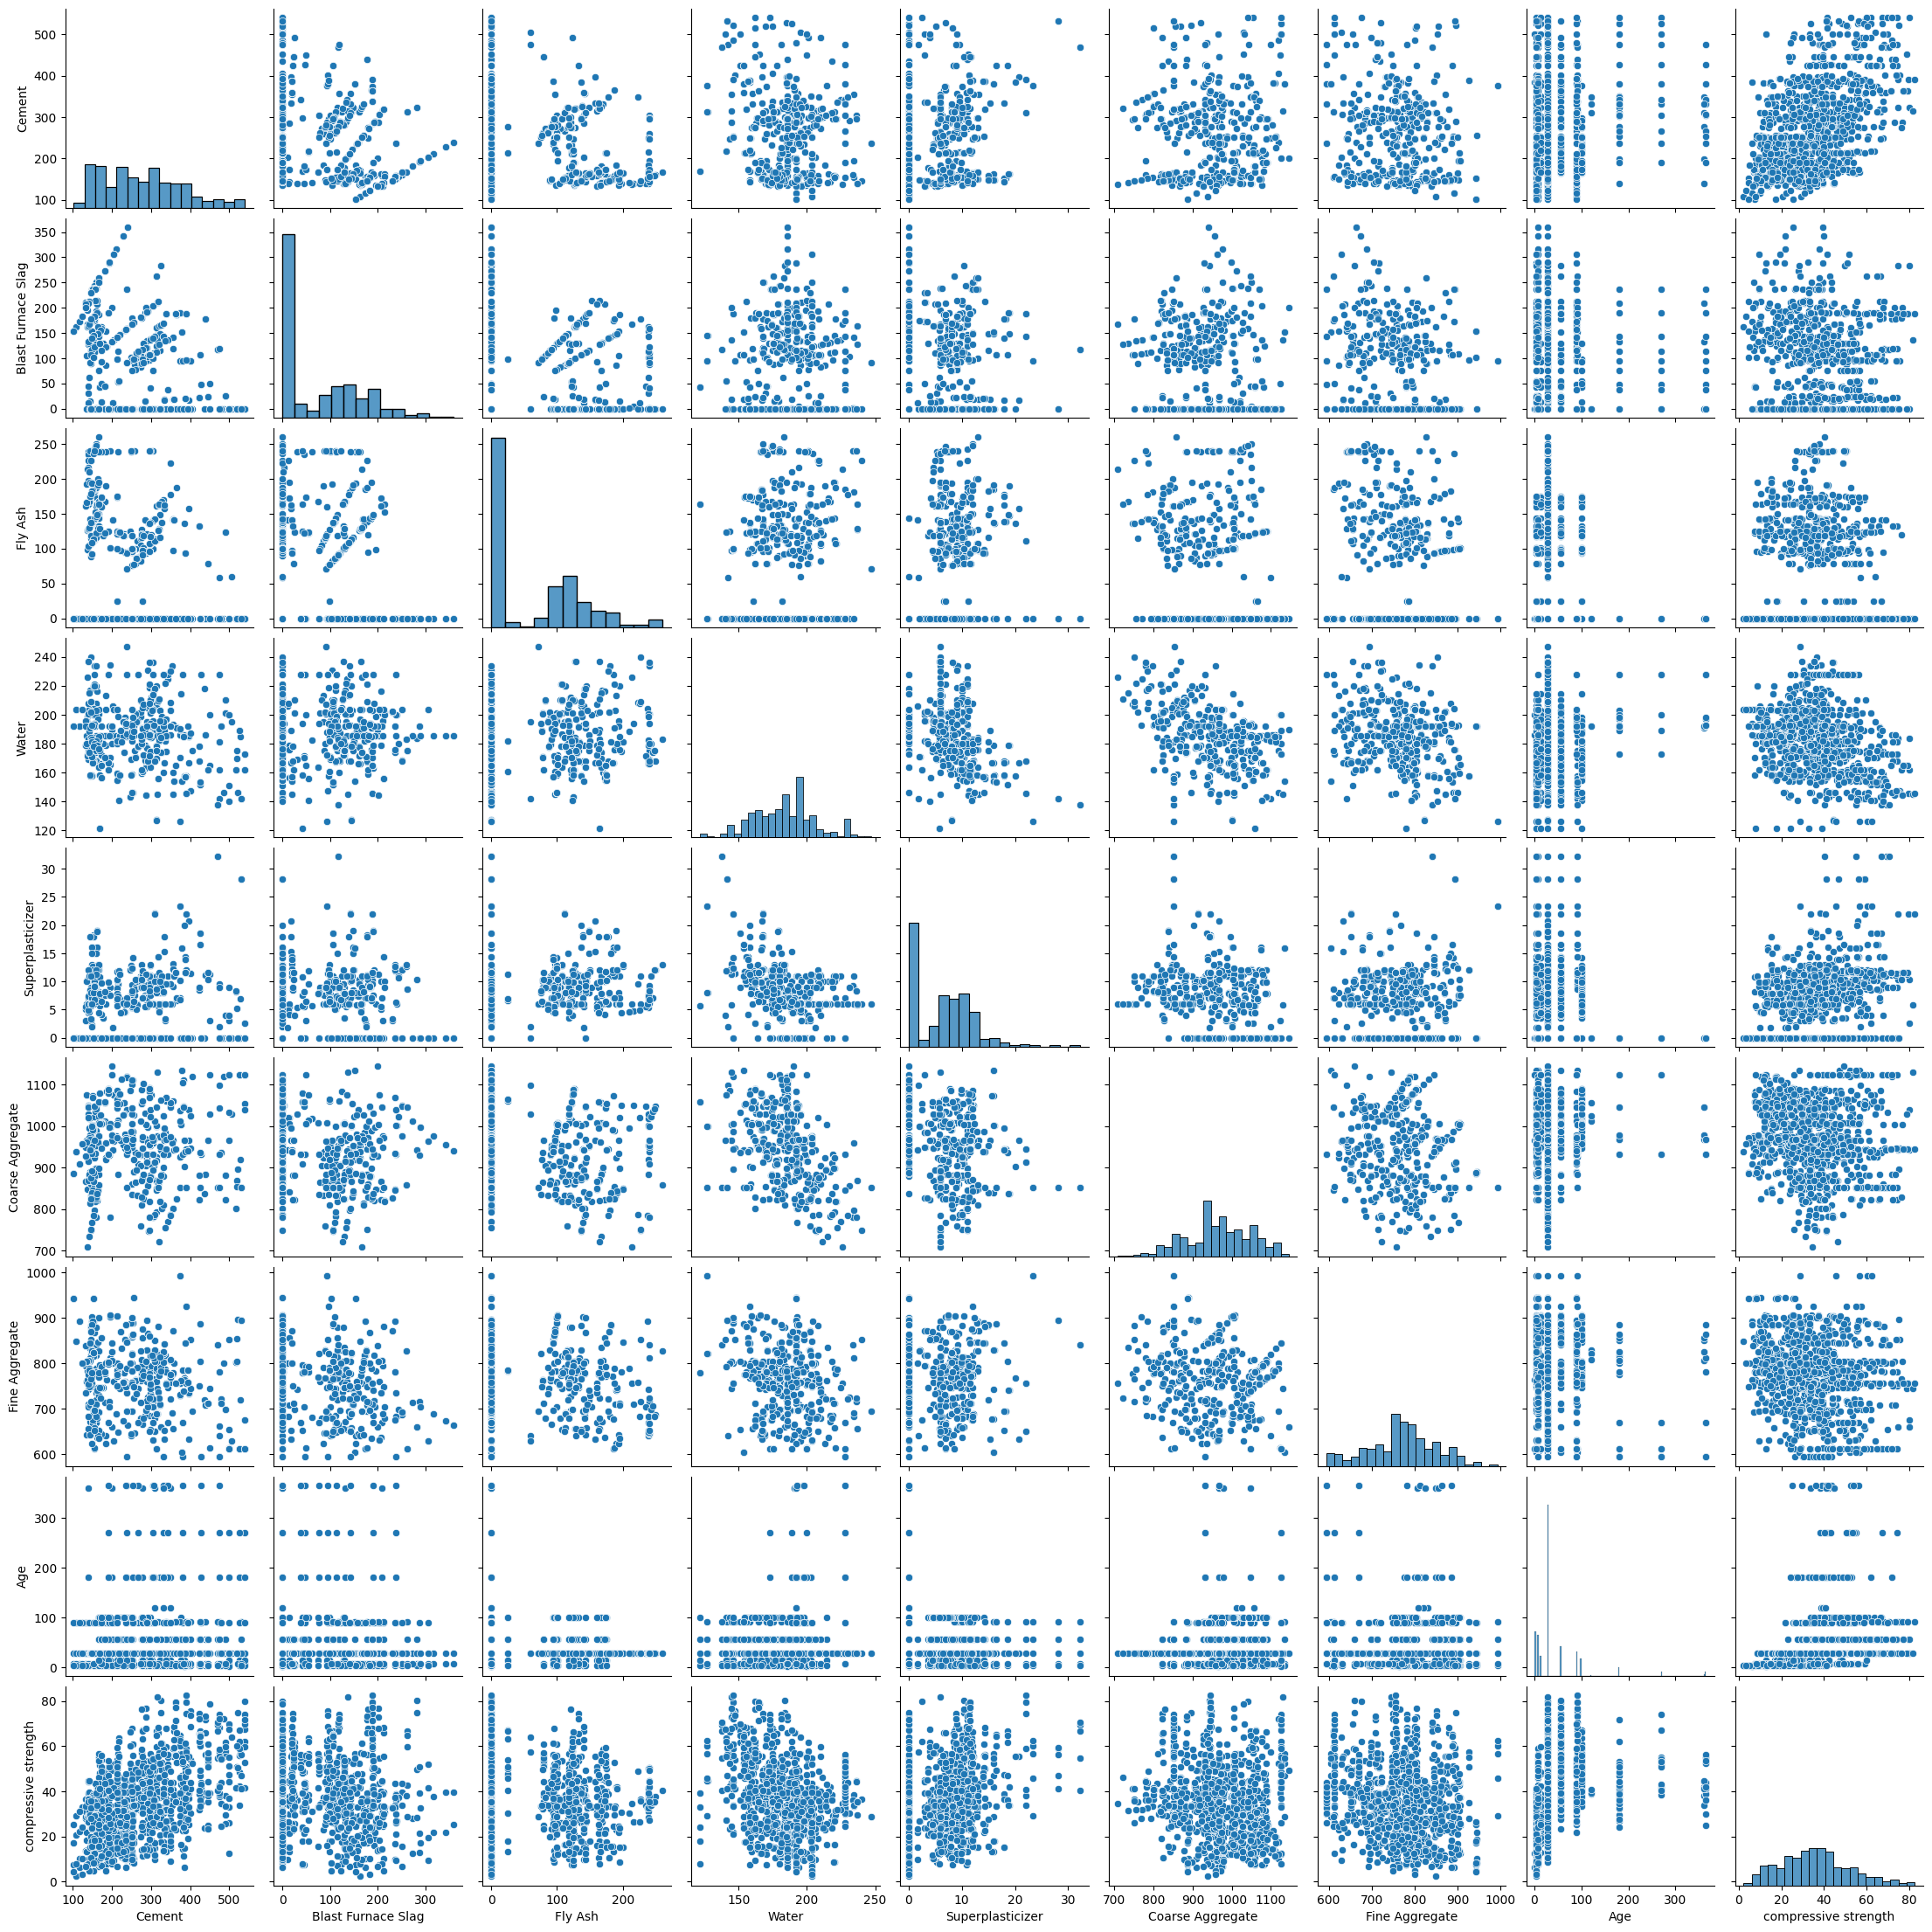

In [82]:
sns.pairplot(new2)

In [83]:
new2.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

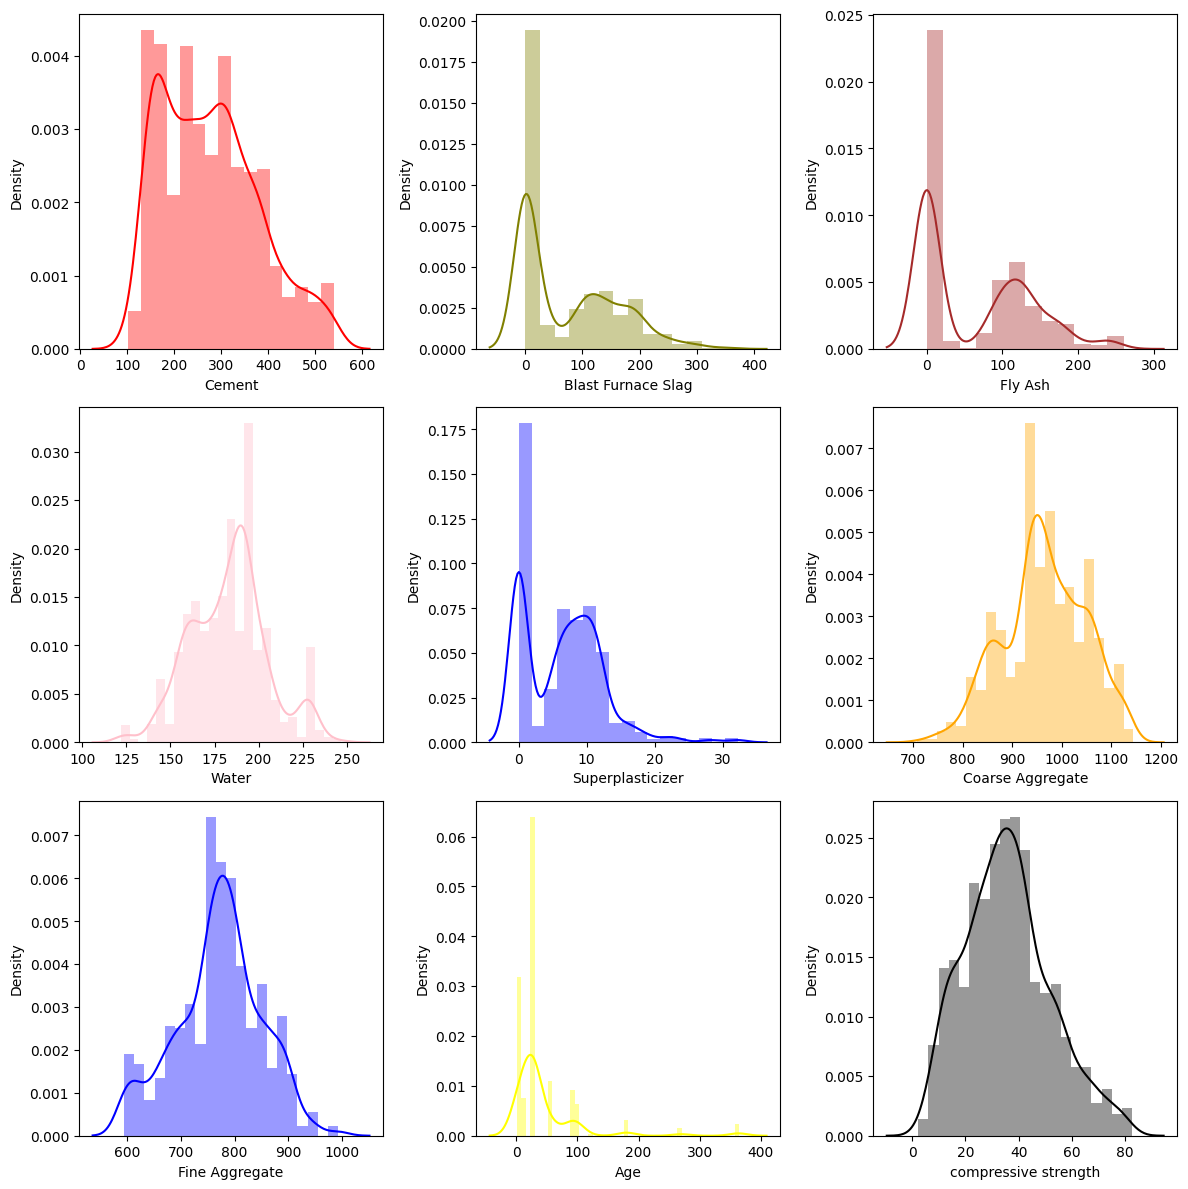

In [84]:
#plotting the distplot for few columns
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.distplot(new2['Cement'] , color="red", ax=axes[0, 0])
sns.distplot(new2['Blast Furnace Slag'] , color="olive", ax=axes[0, 1])
sns.distplot(new2['Fly Ash'] , color="brown", ax=axes[0, 2])
sns.distplot(new2['Water'] , color="pink", ax=axes[1,0])
sns.distplot(new2['Superplasticizer'] , color="blue", ax=axes[1, 1])
sns.distplot(new2['Coarse Aggregate'] , color="orange", ax=axes[1, 2])
sns.distplot(new2['Fine Aggregate'] , color="blue", ax=axes[2, 0])
sns.distplot(new2['Age'] , color="yellow", ax=axes[2,1])
sns.distplot(new2['compressive strength'] , color="black", ax=axes[2, 2])
plt.tight_layout()

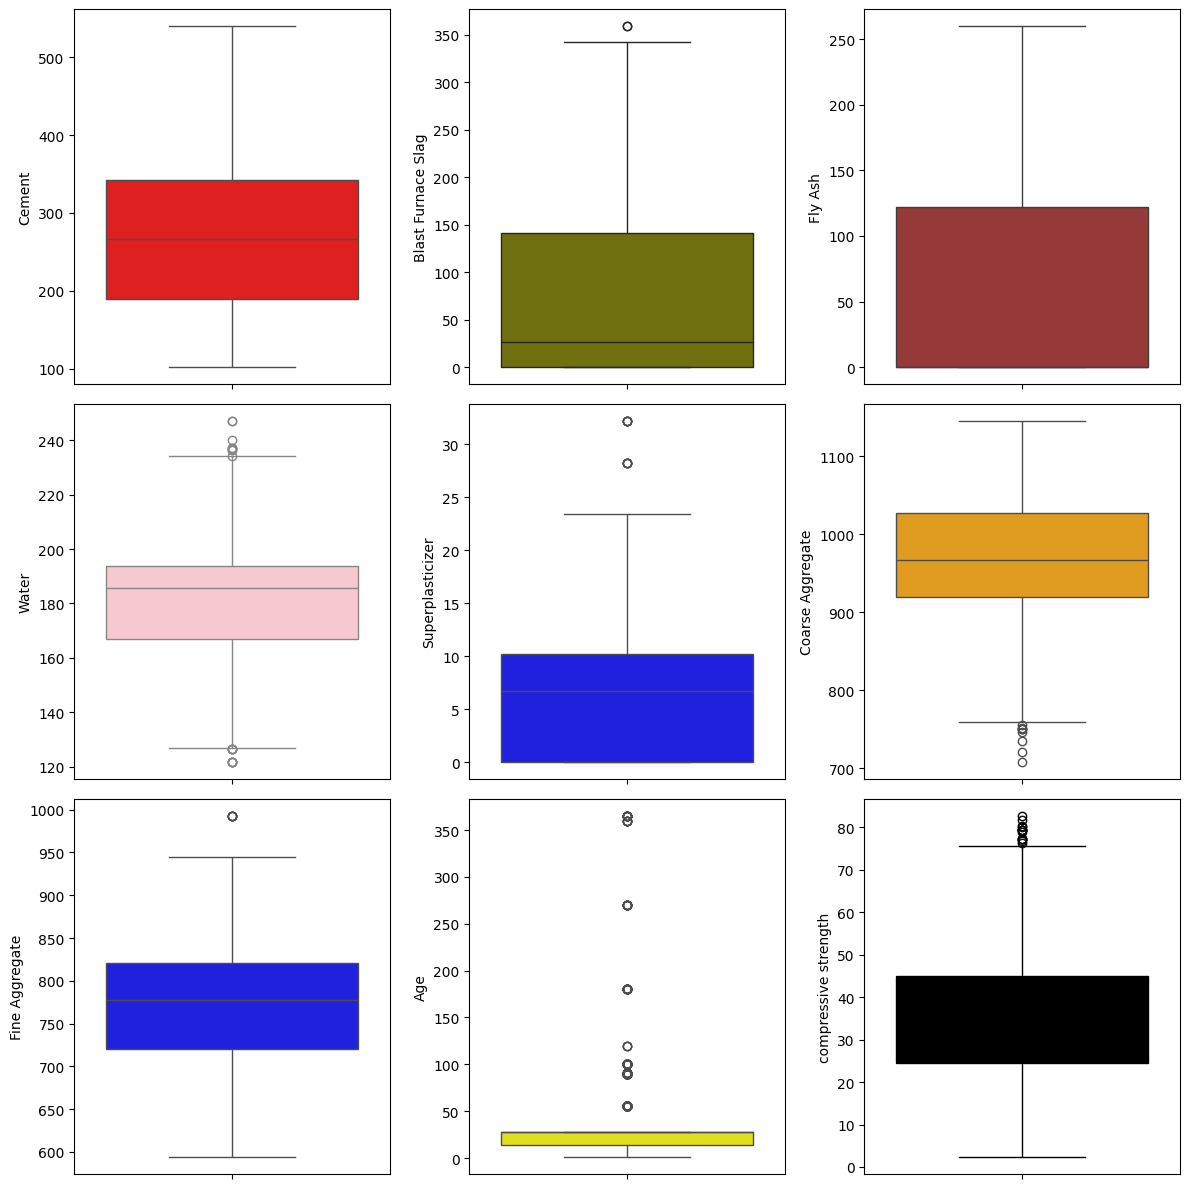

In [88]:
#plotting the boxplot for few columns
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.boxplot(new2['Cement'] , color="red", ax=axes[0, 0])
sns.boxplot(new2['Blast Furnace Slag'] , color="olive", ax=axes[0, 1])
sns.boxplot(new2['Fly Ash'] , color="brown", ax=axes[0, 2])
sns.boxplot(new2['Water'] , color="pink", ax=axes[1,0])
sns.boxplot(new2['Superplasticizer'] , color="blue", ax=axes[1, 1])
sns.boxplot(new2['Coarse Aggregate'] , color="orange", ax=axes[1, 2])
sns.boxplot(new2['Fine Aggregate'] , color="blue", ax=axes[2, 0])
sns.boxplot(new2['Age'] , color="yellow", ax=axes[2,1])
sns.boxplot(new2['compressive strength'] , color="black", ax=axes[2, 2])
plt.tight_layout()

<Axes: >

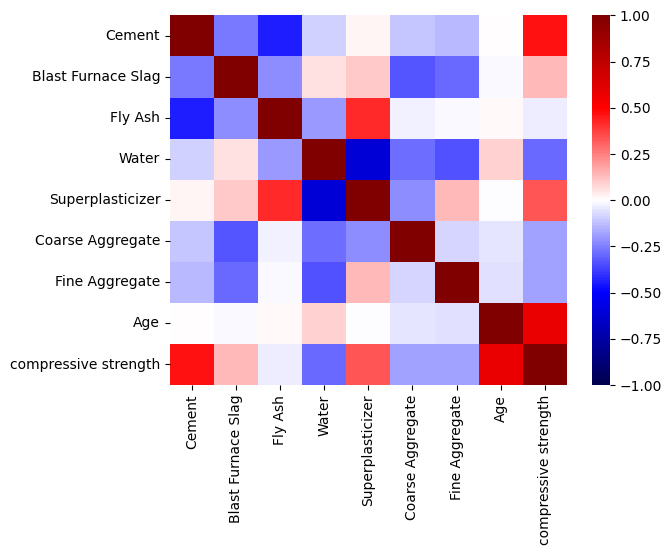

In [90]:
# calculate the correlation matrix
corr = new2.corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,center=0, vmin=-1, vmax=1,cmap='seismic')

In [93]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s

In [94]:
from pycaret.regression import *

In [96]:
Reg_exp = setup(data = new, target = 'Compressive strength', session_id=123)

In [97]:
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [98]:
print(svm)

SVR()


In [99]:
ada = create_model('ada')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
best_model = compare_models(include=['lr','knn','rf','dt','xgboost','ada','gbr','ridge','lasso','svm'], fold=10)

Processing:   0%|          | 0/45 [00:00<?, ?it/s]

In [101]:
Reg_exp2 = setup(data = new2, target = 'compressive strength', session_id=124)

In [102]:
svm2 = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [103]:
print(svm2)

SVR()


In [104]:
best_model2 = compare_models(include=['lr','knn','rf','dt','xgboost','ada','gbr','ridge','lasso','svm'], fold=10)

Processing:   0%|          | 0/45 [00:00<?, ?it/s]